# Accessing Argo data by float using Argopy

Import the usual suspects:

In [1]:
import xarray as xr
xr.set_options(display_style="html", display_expand_attrs=False);
from matplotlib import pyplot as plt
plt.style.use('default')

Import argopy and set-up a data fetcher:

In [2]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(src='erddap', cache=True, cachedir='tmp')

You can load all profiles from a float:

In [3]:
apDS = argo_loader.float(6901254).load().data

or a single cycle:

In [4]:
argo_loader = argo_loader.profile(6901254, 1).load()
apDS2 = argo_loader.data

In [5]:
data = apDS2.argo.point2profile()
data

<xarray.Dataset>
Dimensions:          (N_PROF: 2, N_LEVELS: 97)
Coordinates:
  * N_PROF           (N_PROF) int64 0 1
  * N_LEVELS         (N_LEVELS) int64 0 1 2 3 4 5 6 7 ... 90 91 92 93 94 95 96
    LATITUDE         (N_PROF) float64 29.16 29.18
    LONGITUDE        (N_PROF) float64 -15.49 -15.43
    TIME             (N_PROF) datetime64[ns] 2018-10-23T20:54:00 2018-10-25T0...
Data variables: (12/15)
    CYCLE_NUMBER     (N_PROF) int64 1 1
    DATA_MODE        (N_PROF) <U1 'R' 'R'
    DIRECTION        (N_PROF) <U1 'D' 'A'
    PLATFORM_NUMBER  (N_PROF) int64 6901254 6901254
    POSITION_QC      (N_PROF) int64 1 1
    PRES             (N_PROF, N_LEVELS) float32 14.0 24.0 ... 2.011e+03
    ...               ...
    PSAL_ERROR       (N_PROF) float32 nan nan
    PSAL_QC          (N_PROF) int64 1 1
    TEMP             (N_PROF, N_LEVELS) float32 23.4 23.35 23.33 ... 4.559 4.474
    TEMP_ERROR       (N_PROF) float32 nan nan
    TEMP_QC          (N_PROF) int64 1 1
    TIME_QC          (N_PROF) int64 1 1
Attributes: (8)

The core-Argo profile files contain the core parameters provided by a float: pressure, temperature, salinity, conductivity (PRES, TEMP, PSAL, CNDC).

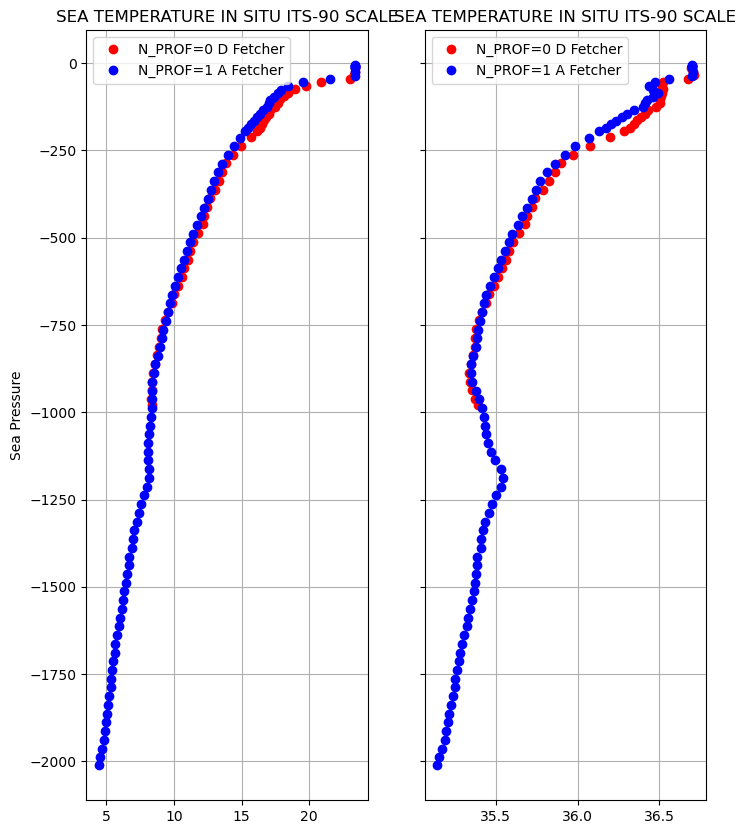

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(8,10), sharey=True)

#Temperature
ax[0].plot(data.TEMP[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[0].plot(data.TEMP[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[0].set_title(data['TEMP'].attrs['long_name'])
ax[0].set_ylabel(data['PRES'].attrs['long_name'])
ax[0].grid()
ax[0].legend();

ax[1].plot(data.PSAL[0],-data.PRES[0],'ro',label='N_PROF=0 D Fetcher')
ax[1].plot(data.PSAL[1],-data.PRES[1],'bo',label='N_PROF=1 A Fetcher')
ax[1].set_title(data['TEMP'].attrs['long_name'])
ax[1].grid()
ax[1].legend();

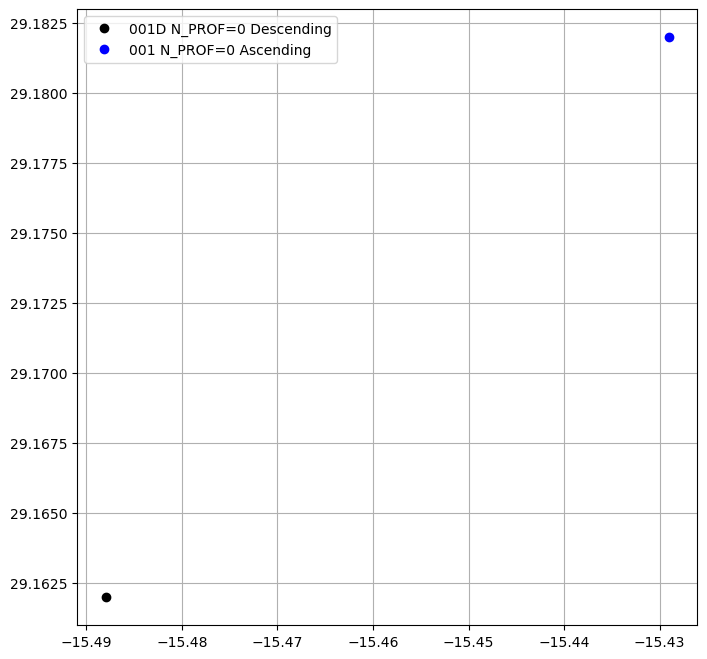

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(data.LONGITUDE[0],data.LATITUDE[0],'ko',label='001D N_PROF=0 Descending')
ax.plot(data.LONGITUDE[1],data.LATITUDE[1],'bo',label='001 N_PROF=0 Ascending')
ax.grid()
ax.legend();

(<Figure size 900x540 with 1 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

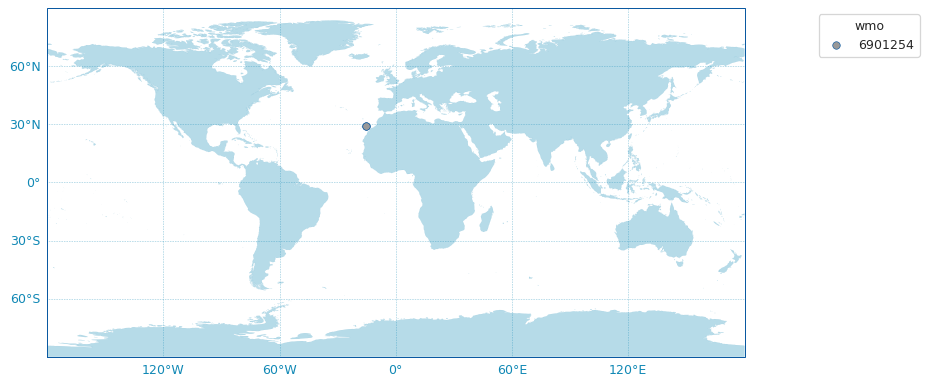

In [8]:
argo_loader.plot('trajectory', set_global=True)